In [3]:
from nilearn import datasets

print(f"Datasets are stored in: {datasets.get_data_dirs()!r}")
motor_images = datasets.fetch_neurovault_motor_task()
motor_images.images
tmap_filename = motor_images.images[0]

Datasets are stored in: ['C:\\Users\\angel/nilearn_data']


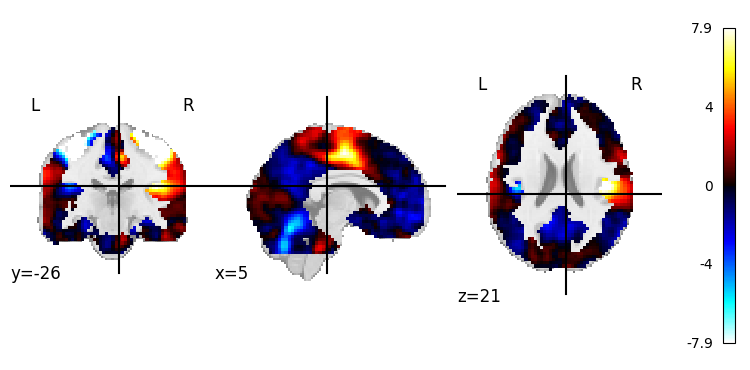

In [5]:
from nilearn import plotting

plotting.plot_stat_map(tmap_filename)

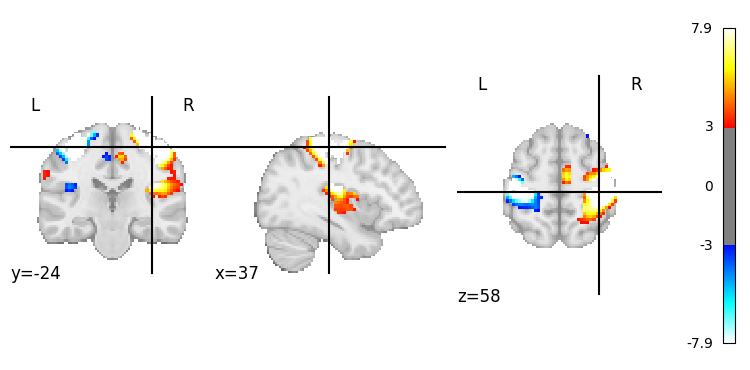

In [6]:
plotting.plot_stat_map(tmap_filename, threshold=3)

C:\Users\angel/nilearn_data\smith_2009\PNAS_Smith09_rsn10.nii.gz
(91, 109, 91, 10)
(91, 109, 91)


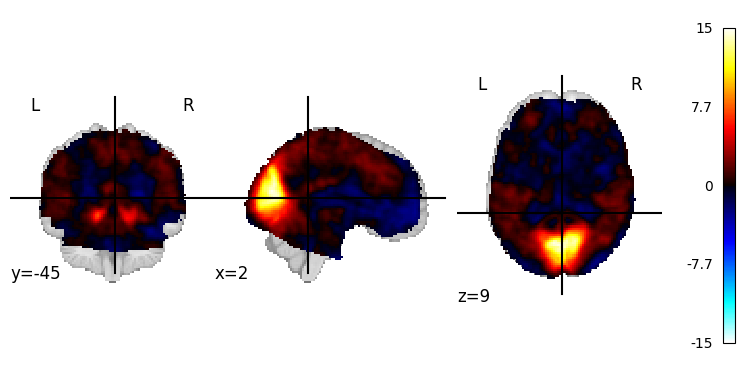

In [26]:
rsn = datasets.fetch_atlas_smith_2009(resting=True, dimension=10)["maps"]
print(rsn)
from nilearn import image

print(image.load_img(rsn).shape)
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)
plotting.plot_stat_map(first_rsn)

for various images from the temporal series

In [ ]:
for img in image.iter_img(rsn):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(
        img, threshold=3, display_mode="z", cut_coords=1, colorbar=False
    )

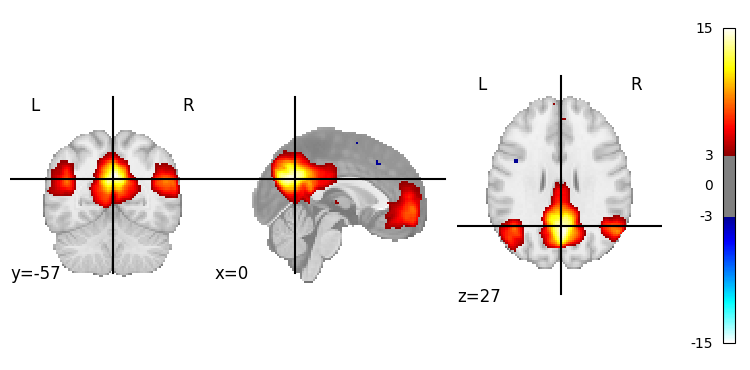

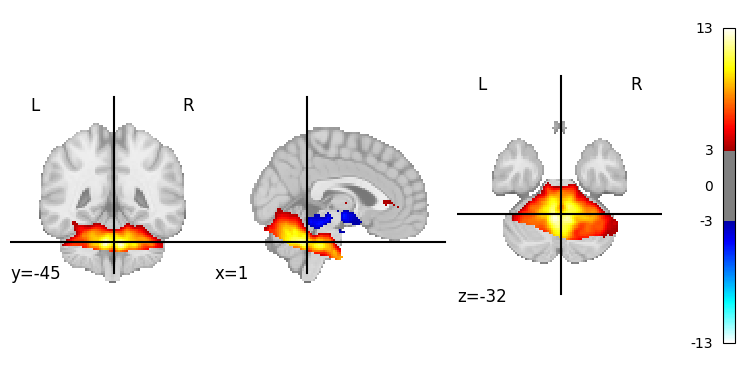

In [15]:
for img in image.iter_img(image.index_img(rsn, slice(3,5))):
    plotting.plot_stat_map(img, threshold=3)

# Next tutorial: 
## Basic nilearn example

In [16]:
# Let us use a Nifti file that is shipped with nilearn
from nilearn.datasets import MNI152_FILE_PATH

# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print(f"Path to MNI152 template: {MNI152_FILE_PATH!r}")

Path to MNI152 template: 'c:\\Users\\angel\\Documents\\pilotStudy_INPD\\fmrianalysis\\Lib\\site-packages\\nilearn\\datasets\\data\\mni_icbm152_t1_tal_nlin_sym_09a_converted.nii.gz'


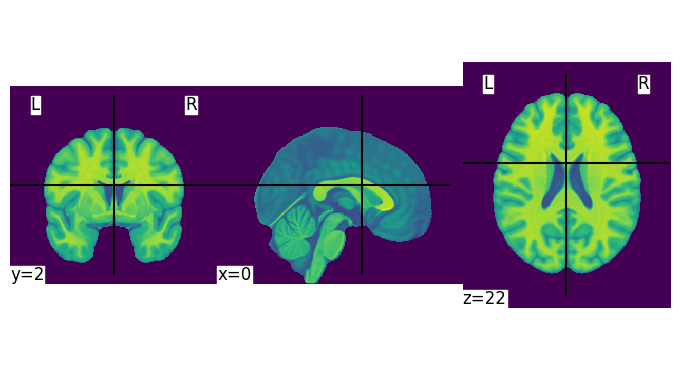

In [17]:
from nilearn import plotting

plotting.plot_img(MNI152_FILE_PATH)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (97, 115, 97, 180)
affine:
[[   2.     0.     0.   -96.5]
 [   0.     2.     0.  -132.5]
 [   0.     0.     2.   -78.5]
 [   0.     0.     0.     1. ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  97 115  97 180   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 2. 2. 2. 2. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 13438.651
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTrans

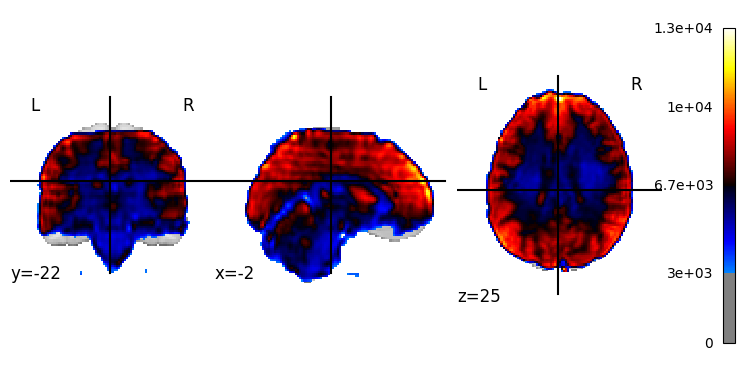

In [31]:
aaa = 'C://Users//angel//Documents//pilotStudy_INPD//data//sub-00003//ses-1//func//sub-00003_ses-1_task-rest_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'
print(image.load_img(aaa))
first_rsn = image.index_img(aaa, 0)
print(first_rsn.shape)
plotting.plot_stat_map(first_rsn,threshold=3000)

# plotting.plot_img("")

In [32]:
from nilearn import datasets

from pathlib import Path

anats_all_subjects = (
    Path(/ "haxby2001" / "subj*" / "anat*"
)


Dataset created in C:\Users\angel/nilearn_data\haxby2001



 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 34840576 of 314803244 bytes (11.1%,  3.1min remaining)

KeyboardInterrupt: 

# New tutorial
## fmri deconding

In [33]:
from nilearn import datasets

# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()
# 'func' is a list of filenames: one for each subject
fmri_filename = haxby_dataset.func[0]

# print basic information on the dataset
print(f"First subject functional nifti images (4D) are at: {fmri_filename}")
#### it is just from subj2 that we are plotting and analizing, maybe the task is for each sub present the stimulus

Downloaded 290775040 of 291168628 bytes (99.9%,    0.2s remaining) ...done. (164 seconds, 2 min)
Extracting data from C:\Users\angel/nilearn_data\haxby2001\0a7df7e6986f9ca94043f4c67ae3792a\subj2-2010.01.14.tar.gz...

First subject functional nifti images (4D) are at: C:\Users\angel/nilearn_data\haxby2001\subj2\bold.nii.gz


.. done.


plotting the mean image of a fMRI study

c:\Users\angel\Documents\pilotStudy_INPD\fmrianalysis\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



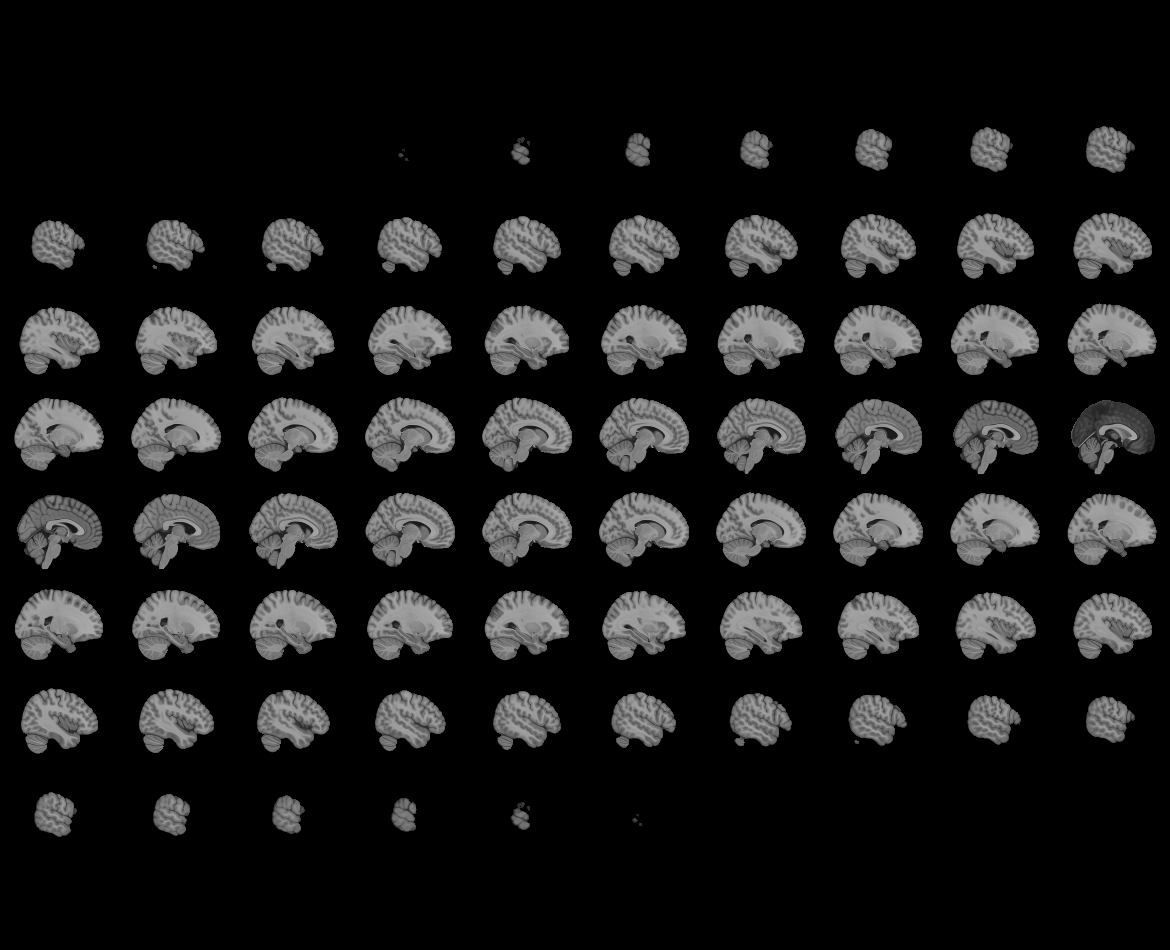
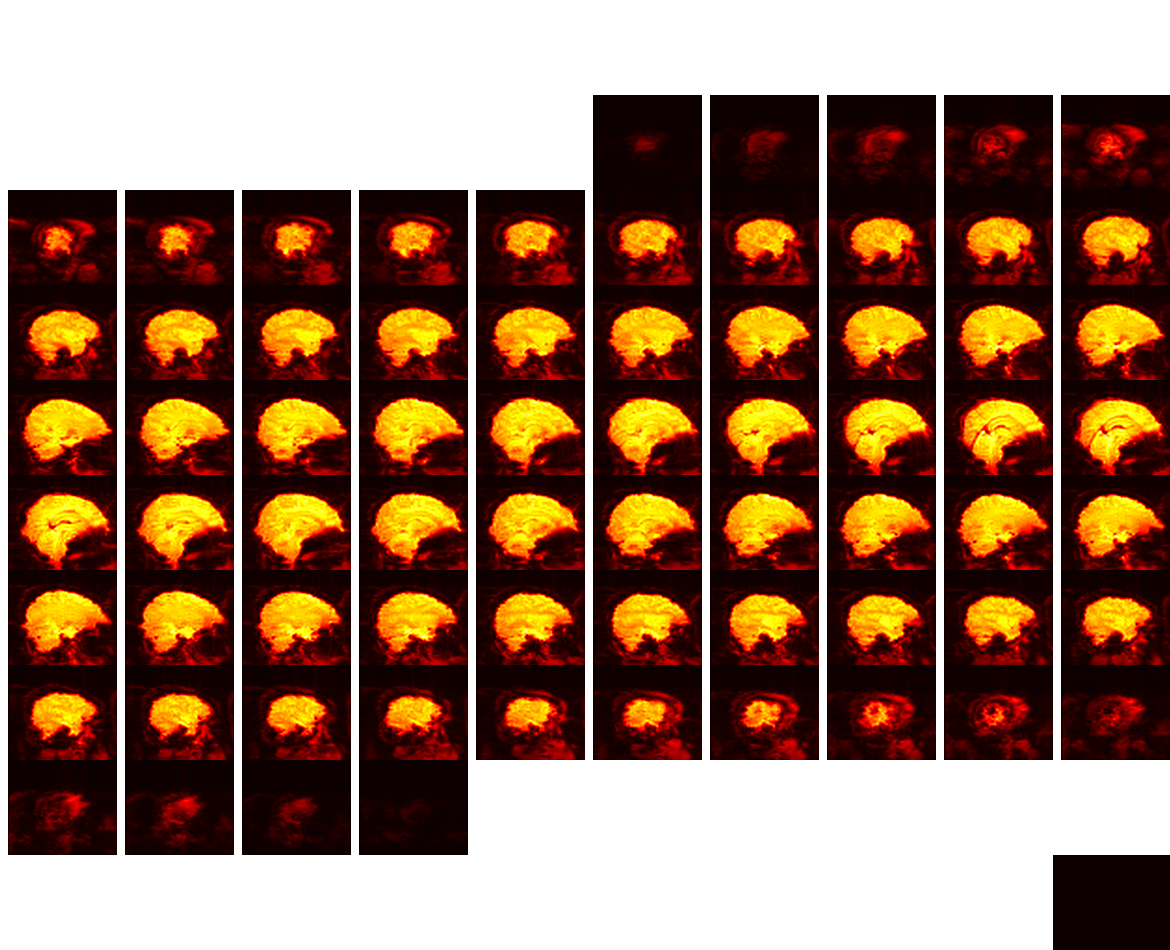

In [34]:
from nilearn import plotting
from nilearn.image import mean_img

plotting.view_img(mean_img(fmri_filename), threshold=None)

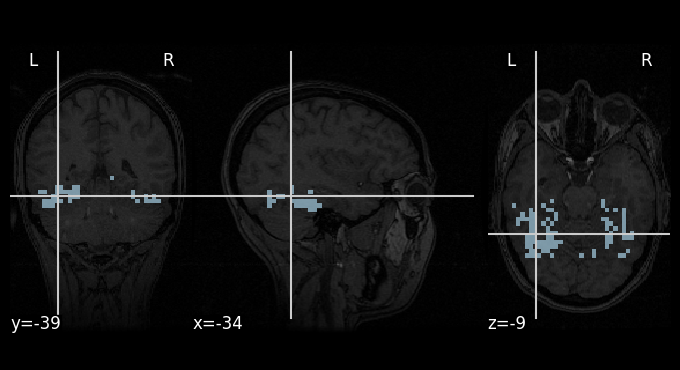

In [35]:
mask_filename = haxby_dataset.mask_vt[0] #ventro temporal cortex

# Let's visualize it, using the subject's anatomical image as a background
plotting.plot_roi(mask_filename, bg_img=haxby_dataset.anat[0], cmap="Paired")

In [36]:
import pandas as pd

# Load behavioral information
behavioral = pd.read_csv(haxby_dataset.session_target[0], delimiter=" ")
print(behavioral)

     labels  chunks
0      rest       0
1      rest       0
2      rest       0
3      rest       0
4      rest       0
...     ...     ...
1447   rest      11
1448   rest      11
1449   rest      11
1450   rest      11
1451   rest      11

[1452 rows x 2 columns]


In [37]:
from nilearn.image import index_img
####
### here we are only selecting the labels of the behevioural dataframe. This represents the tasks done during aquisition
### then we select the index of images such that they are face or cat in label. 
####
conditions = behavioral["labels"]
print(conditions)
condition_mask = conditions.isin(["face", "cat"])
fmri_niimgs = index_img(fmri_filename, condition_mask)
conditions = conditions[condition_mask]
# Convert to numpy array
conditions = conditions.values
print(conditions.shape)

0       rest
1       rest
2       rest
3       rest
4       rest
        ... 
1447    rest
1448    rest
1449    rest
1450    rest
1451    rest
Name: labels, Length: 1452, dtype: object
(216,)


In [38]:
from nilearn.decoding import Decoder
## here we create a model: vector suport machine with a square kernel that fits the data to the condition
decoder = Decoder(
    estimator="svc", mask=mask_filename, standardize="zscore_sample"
)
decoder.fit(fmri_niimgs, conditions)

c:\Users\angel\Documents\pilotStudy_INPD\fmrianalysis\Lib\site-packages\nilearn\image\resampling.py:492: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(


In [39]:
prediction = decoder.predict(fmri_niimgs)
print(prediction)

['face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'face' 'face' 'face' 'face' 'face' 'face' 'face' '

c:\Users\angel\Documents\pilotStudy_INPD\fmrianalysis\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



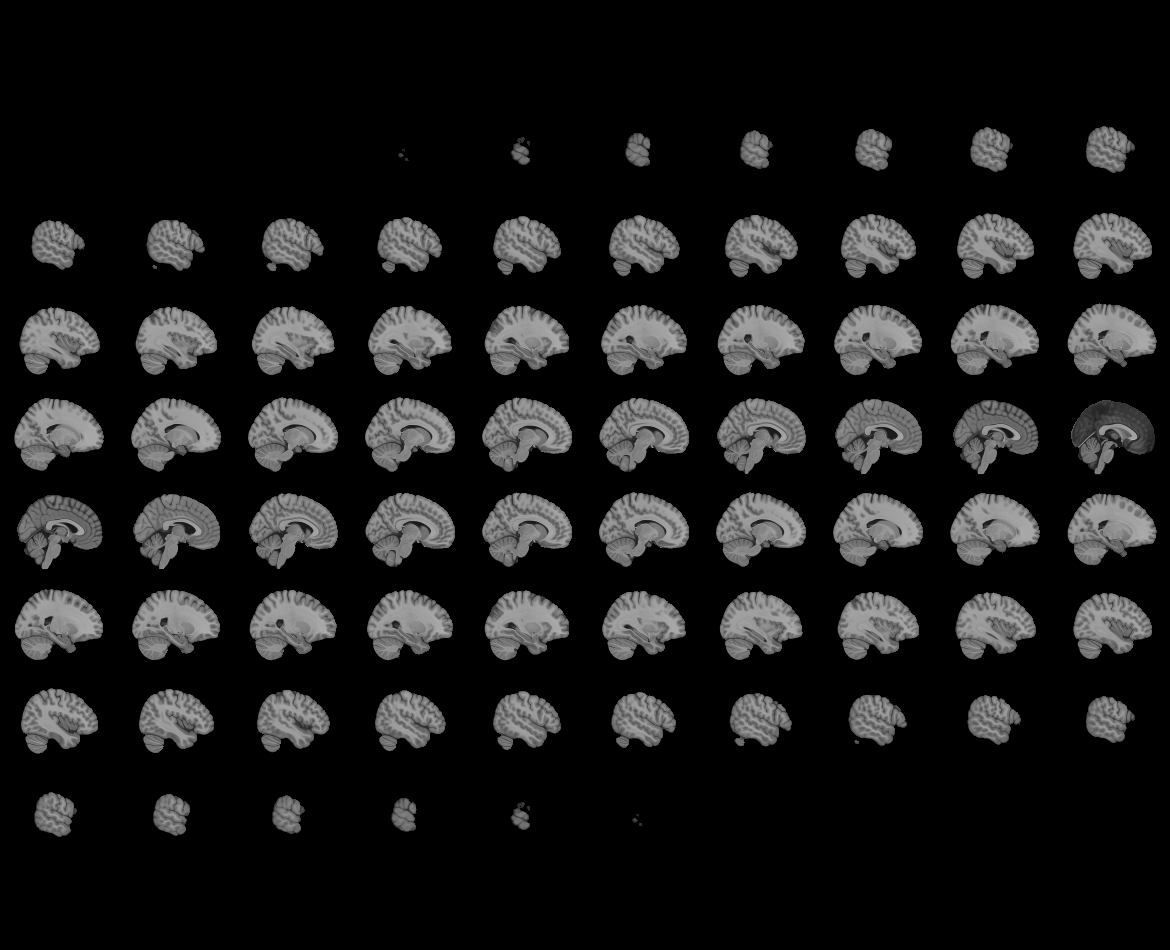
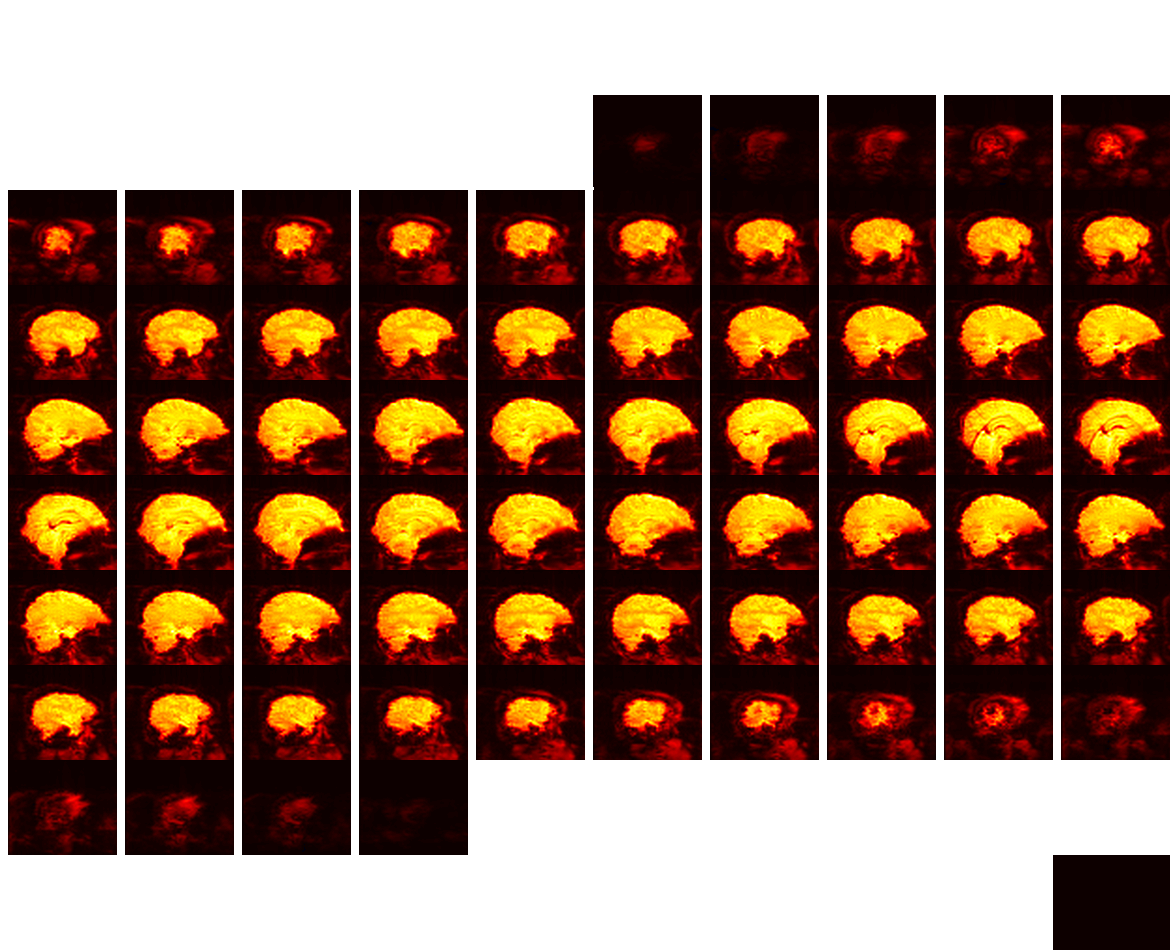

In [42]:
plotting.view_img(mean_img(fmri_niimgs))

In [43]:
fmri_niimgs_train = index_img(fmri_niimgs, slice(0, -30))
fmri_niimgs_test = index_img(fmri_niimgs, slice(-30, None))
conditions_train = conditions[:-30]
conditions_test = conditions[-30:]

decoder = Decoder(
    estimator="svc", mask=mask_filename, standardize="zscore_sample"
)
decoder.fit(fmri_niimgs_train, conditions_train)

prediction = decoder.predict(fmri_niimgs_test)

# The prediction accuracy is calculated on the test data: this is the accuracy
# of our model on examples it hasn't seen to examine how well the model perform
# in general.

predicton_accuracy = (prediction == conditions_test).sum() / float(
    len(conditions_test)
)
print(f"Prediction Accuracy: {predicton_accuracy:.3f}")

c:\Users\angel\Documents\pilotStudy_INPD\fmrianalysis\Lib\site-packages\nilearn\image\resampling.py:492: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(


Prediction Accuracy: 0.767


# GLM tutorial


In [1]:
from nilearn.datasets import fetch_spm_auditory
## retriving the data
subject_data = fetch_spm_auditory()
print(*subject_data.func[:5], sep="\n")  # print paths of first 5 func images


Dataset created in C:\Users\angel/nilearn_data\spm_auditory

Data absent, downloading...


Downloaded 32890880 of 34212021 bytes (96.1%,    0.5s remaining) ...done. (15 seconds, 0 min)
Extracting data from C:\Users\angel/nilearn_data\spm_auditory\sub001\MoAEpilot.zip..... done.


C:\Users\angel/nilearn_data\spm_auditory\sub001\fM00223/fM00223_004.img
C:\Users\angel/nilearn_data\spm_auditory\sub001\fM00223/fM00223_005.img
C:\Users\angel/nilearn_data\spm_auditory\sub001\fM00223/fM00223_006.img
C:\Users\angel/nilearn_data\spm_auditory\sub001\fM00223/fM00223_007.img
C:\Users\angel/nilearn_data\spm_auditory\sub001\fM00223/fM00223_008.img


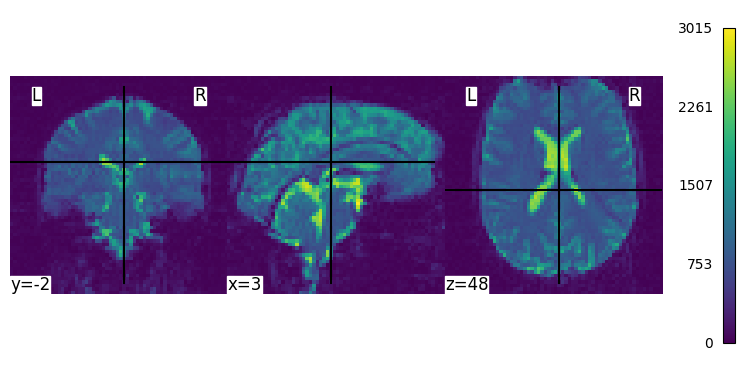

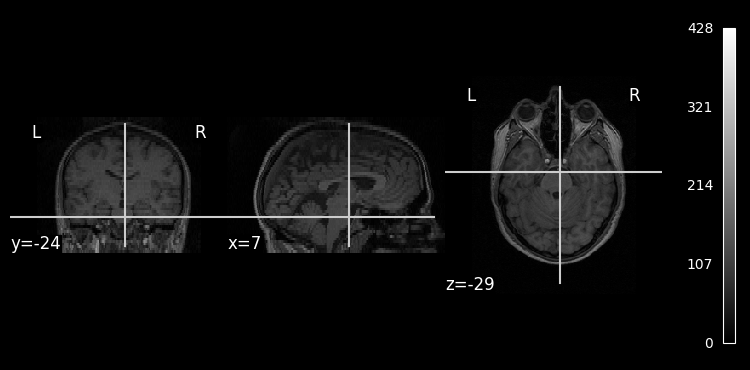

In [2]:
from nilearn.plotting import plot_anat, plot_img, plot_stat_map

plot_img(subject_data.func[0], colorbar=True, cbar_tick_format="%i")
plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

In [3]:
from nilearn.image import concat_imgs, mean_img

fmri_img = concat_imgs(subject_data.func) # concatenate all functional image to create the time series in one data structure
mean_img = mean_img(fmri_img)

In [6]:
import pandas as pd

events = pd.read_table(subject_data["events"])
events

,onset,duration,trial_type
0,0.0,42.0,rest
1,42.0,42.0,active
2,84.0,42.0,rest
3,126.0,42.0,active
4,168.0,42.0,rest
5,210.0,42.0,active
6,252.0,42.0,rest
7,294.0,42.0,active
8,336.0,42.0,rest
9,378.0,42.0,active


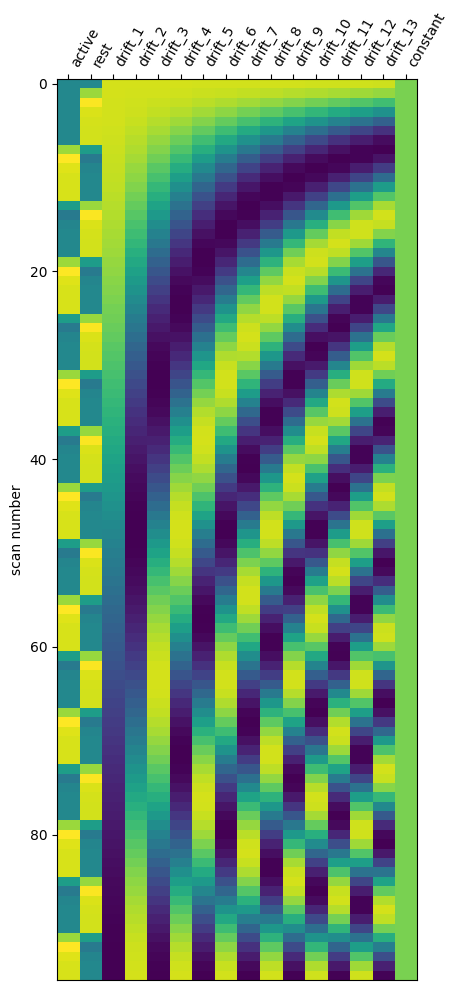

In [7]:
from nilearn.glm.first_level import FirstLevelModel
fmri_glm = FirstLevelModel(
    t_r=7,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
    high_pass=0.01,
)
fmri_glm = fmri_glm.fit(fmri_img, events)
design_matrix = fmri_glm.design_matrices_[0]
import matplotlib.pyplot as plt

from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix)

plt.show()